In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor


In [2]:
# Load the CSV data into a Pandas dataframe
data = pd.read_csv('/content/BTC-USD.csv')

# Inspect the data
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())


         Date          Open          High           Low         Close  \
0  2022-09-12  21770.148438  22439.181641  21603.896484  22370.449219   
1  2022-09-13  22371.480469  22673.820313  20062.669922  20296.707031   
2  2022-09-14  20184.554688  20467.201172  19793.396484  20241.089844   
3  2022-09-15  20242.289063  20318.166016  19636.734375  19701.210938   
4  2022-09-16  19704.005859  19870.628906  19400.076172  19772.583984   

      Adj Close       Volume  
0  22370.449219  50212088965  
1  20296.707031  51091116622  
2  20241.089844  37872380889  
3  19701.210938  36389011503  
4  19772.583984  30123362273  
           Date          Open          High           Low         Close  \
361  2023-09-08  26245.208984  26414.005859  25677.480469  25905.654297   
362  2023-09-09  25905.425781  25921.976563  25810.494141  25895.677734   
363  2023-09-10  25895.210938  25978.130859  25640.261719  25832.226563   
364  2023-09-11  25831.714844  25883.947266  24930.296875  25162.654297   


In [3]:
# Handle missing values
data.dropna(inplace=True)

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Check for any remaining missing values
print(data.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


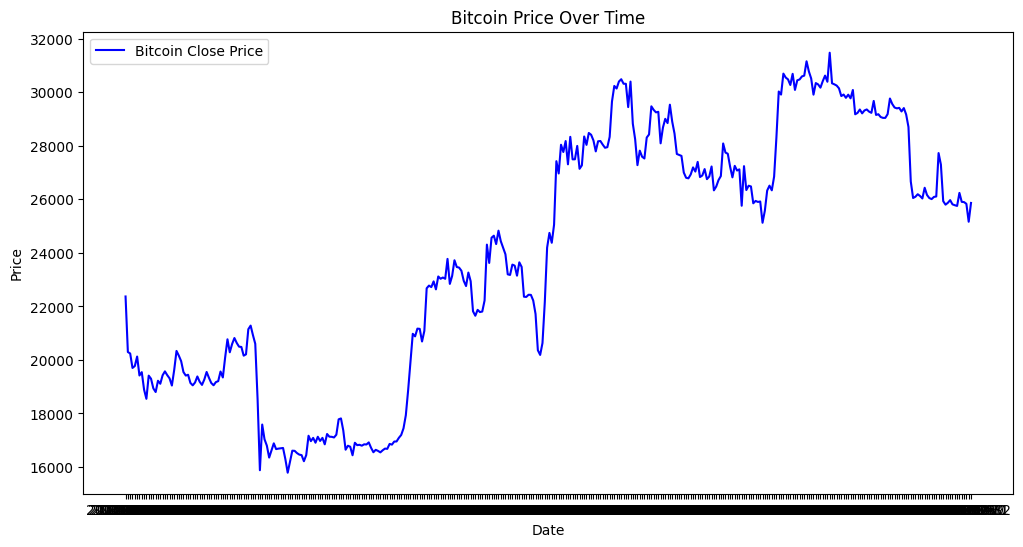

In [4]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Bitcoin Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.show()


In [5]:
# Calculate daily price changes
data['Price Change'] = data['Close'].diff()

# Calculate moving averages
data['MA_7'] = data['Close'].rolling(window=7).mean()
data['MA_30'] = data['Close'].rolling(window=30).mean()

# Calculate volatility indicators (e.g., Bollinger Bands, Average True Range, etc.)

# You can add more feature engineering here based on your needs


In [6]:
# Scale or normalize features as needed
scaler = StandardScaler()
data[['Close', 'Volume', 'Price Change', 'MA_7', 'MA_30']] = scaler.fit_transform(data[['Close', 'Volume', 'Price Change', 'MA_7', 'MA_30']])

# Convert categorical variables to numeric (if any)
# For example, you can one-hot encode categorical columns using OneHotEncoder


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the original data.csv
data = pd.read_csv('/content/BTC-USD.csv')

# Split the dataset into a training set and a test set (80% training, 20% test)
X = data.drop(['Close', 'Date'], axis=1)
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create training and test dataframes
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

# Save the training and test dataframes as train.csv and test.csv
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)
data = pd.read_csv('/content/train.csv')


In [23]:
# Drop rows with missing values in both training and test data
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Match the labels with the remaining rows
X_test.dropna(inplace=True)
y_test = y_test[X_test.index]  # Match the labels with the remaining rows


In [24]:
# Fine-tune hyperparameters for the best performing models using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_rf.fit(X_train, y_train)

# You can do the same for other models


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [100, 200, 300]})

In [25]:
# Try combining multiple models into an ensemble model to improve accuracy (e.g., VotingRegressor)
ensemble_model = VotingRegressor([('lr', model_lr), ('rf', model_rf), ('xgb', model_xgb)])
ensemble_model.fit(X_train, y_train)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))])

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the models
model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

# Fit the models with training data
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

# Make predictions for each model
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

# Calculate MAE for each model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Calculate RMSE for each model
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

# Calculate R-squared for each model
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the results for each model
print("Linear Regression Metrics:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)

print("\nRandom Forest Metrics:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)

print("\nXGBoost Metrics:")
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("R-squared:", r2_xgb)


Linear Regression Metrics:
MAE: 3.941897523111186e-09
RMSE: 6.302411126944488e-09
R-squared: 1.0

Random Forest Metrics:
MAE: 73.50843157486203
RMSE: 116.77690807981828
R-squared: 0.9994011546479196

XGBoost Metrics:
MAE: 88.63671878209449
RMSE: 148.04425063478055
R-squared: 0.9990375374699821


In [36]:
# Load the test dataset (replace 'test.csv' with the filename of your test dataset)
test_data = pd.read_csv('/content/test.csv')

# Check if 'Date' column exists in the test dataset before dropping it
if 'Date' in test_data.columns:
    X_test = test_data.drop(['Close', 'Date'], axis=1)
else:
    X_test = test_data.drop(['Close'], axis=1)


In [37]:
# Initialize the models
model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_xgb = XGBRegressor()

# Fit the models with training data
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

# Make predictions using your trained models on the test dataset
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)

# Calculate evaluation metrics for the predictions (MAE, RMSE, R-squared)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics for each model on the test dataset
print("Linear Regression Metrics on Test Dataset:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)

print("\nRandom Forest Metrics on Test Dataset:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)

print("\nXGBoost Metrics on Test Dataset:")
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("R-squared:", r2_xgb)


Linear Regression Metrics on Test Dataset:
MAE: 3.941897523111186e-09
RMSE: 6.302411126944488e-09
R-squared: 1.0

Random Forest Metrics on Test Dataset:
MAE: 77.40969136756298
RMSE: 130.15338702797396
R-squared: 0.9992561049179626

XGBoost Metrics on Test Dataset:
MAE: 88.63671878209449
RMSE: 148.04425063478055
R-squared: 0.9990375374699821
